In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load California Housing Dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target  # Target variable

# Display dataset info
print(df.head())  # First 5 rows
print(df.info())  # Check for missing values and data types


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup   

In [3]:
# Normalize numerical features
def min_max_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

X = df.drop(columns=['PRICE'])  # Features
X = min_max_scaling(X)  # Normalize
y = df['PRICE']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)  # Verify shape


(16512, 8) (4128, 8)


In [5]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

# Train Model
model = LinearRegressionScratch(lr=0.01, epochs=1000)
model.fit(X_train.to_numpy(), y_train.to_numpy())

# Print learned parameters
print(model.weights, model.bias)


[ 1.23098863e+00  6.30392247e-01  6.80938174e-02  2.15317537e-02
  5.09816664e-02 -5.02433571e-04  1.16521549e-01  4.09696318e-01] 1.207561332864337


In [7]:
y_pred = model.predict(X_test.to_numpy())
print("Predictions:", y_pred[:5])


Predictions: [1.87003434 1.97501732 2.23795275 2.10670605 2.04272928]


In [9]:
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def r2_score(y_true, y_pred):
    return 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))

print(f"RMSE: {rmse(y_test, y_pred):.3f}, R²: {r2_score(y_test, y_pred):.3f}")


RMSE: 1.041, R²: 0.174


In [11]:
models = {
    "Linear Regression": LinearRegressionScratch()
}

for name, model in models.items():
    model.fit(X_train.to_numpy(), y_train.to_numpy())
    y_pred = model.predict(X_test.to_numpy())
    print(f"{name} - RMSE: {rmse(y_test, y_pred):.3f}, R²: {r2_score(y_test, y_pred):.3f}")


Linear Regression - RMSE: 1.041, R²: 0.174


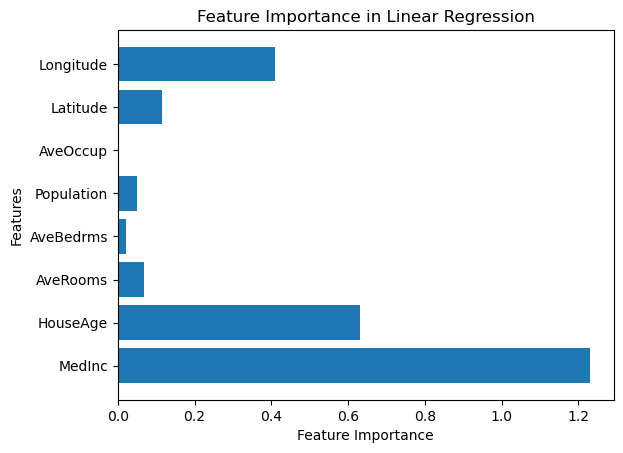

In [13]:
import matplotlib.pyplot as plt

feature_importance = abs(model.weights)

plt.barh(X_train.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Linear Regression")
plt.show()
